In [14]:
#!gdown 1DswV_tU1--JlB9fkxJPPRL2dLCB7hCa7
#!unzip "/content/ASL.zip"

In [15]:
cd "F:\\Insaid\\ASL\\"

F:\Insaid\ASL


In [16]:
import keras,os
from tensorflow.keras import layers,regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import scipy
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import BatchNormalization


In [17]:
#!pip install split-folders

In [18]:
#import splitfolders # or import splitfolders
#input_folder = "F:\\Insaid\\ASL\data\\asl_alphabet_train\\asl_alphabet_train\\"
#output = "F:\\Insaid\\ASL\\data\\op\\" #where you want the split datasets saved. one will be created if it does not exist or none is set

#splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2))

In [19]:
trdata = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
tsdata = ImageDataGenerator( rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator  = trdata.flow_from_directory("F:\\Insaid\\ASL\\data\\op\\train\\", batch_size = 20,target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator  = tsdata.flow_from_directory( "F:\\Insaid\\ASL\\data\\op\\val\\",  batch_size = 20, target_size = (224, 224))


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [20]:
print(validation_generator.class_indices) 



{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [21]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')



In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
for layer in base_model.layers:
    layer.trainable = False

In [24]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation=(keras.layers.LeakyReLU(alpha=0.01)),kernel_regularizer=(regularizers.l2(0.001)))(x)

x = BatchNormalization()(x)

x = layers.Dense(256, activation=(keras.layers.LeakyReLU(alpha=0.01)),kernel_regularizer=(regularizers.l2(0.001)))(x)

x = BatchNormalization()(x)
x = Dropout(.2)(x)
x = layers.Dense(128, activation=(keras.layers.LeakyReLU(alpha=0.01)),kernel_regularizer=(regularizers.l2(0.001)))(x)

x = BatchNormalization()(x)
x = Dropout(.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(29, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [25]:
checkpoint = keras.callbacks.ModelCheckpoint("Vgg16_ASL.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0, patience=100, verbose=1, mode='auto')

In [26]:
hist = model.fit_generator(generator= train_generator, steps_per_epoch= 10, epochs= 1000, validation_data= validation_generator, validation_steps=2, callbacks=[checkpoint,early])

C:\Users\mailp\AppData\Local\Temp\ipykernel_3420\2786403754.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator= train_generator, steps_per_epoch= 10, epochs= 1000, validation_data= validation_generator, validation_steps=2, callbacks=[checkpoint,early])


Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 6.1229 - accuracy: 0.0500
Epoch 1: val_loss improved from inf to 5.49043, saving model to Vgg16_ASL.h5
10/10 [==============================] - 21s 1s/step - loss: 6.1229 - accuracy: 0.0500 - val_loss: 5.4904 - val_accuracy: 0.0500
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 6.0116 - accuracy: 0.0350
Epoch 2: val_loss improved from 5.49043 to 5.47610, saving model to Vgg16_ASL.h5
10/10 [==============================] - 13s 1s/step - loss: 6.0116 - accuracy: 0.0350 - val_loss: 5.4761 - val_accuracy: 0.0500
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 6.1416 - accuracy: 0.0300
Epoch 3: val_loss improved from 5.47610 to 5.42529, saving model to Vgg16_ASL.h5
10/10 [==============================] - 13s 1s/step - loss: 6.1416 - accuracy: 0.0300 - val_loss: 5.4253 - val_accuracy: 0.0750
Epoch 4/1000
10/10 [==============================] - ETA: 0s - loss: 6.1084 - accurac

In [27]:
model.save("Vgg16_ASL.h5")

In [33]:
from tensorflow.keras.models import load_model

def load_model_fn():
    model = load_model('Vgg16_ASL.h5')

    return model
saved_model = load_model_fn()



In [34]:
saved_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [161]:
def category(output):
    max = np.argmax(output)
    category = ''
    if max == 0:
      category = "A"
    elif max == 1:
      category = "B"
    elif max == 2:
      category = "C"
    elif max == 3:
      category = "D"
    elif max == 4:
      category = "del"
    elif max == 5:
      category = "E"
    elif max == 6:
      category = "F"
    elif max == 7:
      category = "G"
    elif max == 8:
      category = "H" 
    elif max == 9:
      category = "I"
    elif max == 10:
      category = "J"
    elif max == 11:
      category = "K"
    elif max == 12:
      category = "L"
    elif max == 13:
      category = "M"
    elif max == 14:
      category = "N"
    elif max == 15:
      category = "nothing"
    elif max == 16:
      category = "O"
    elif max == 17:
      category = "P" 
    elif max == 18:
      category = "Q"
    elif max == 19:
      category = "R"
    elif max == 20:
      category = "S"
    elif max == 21:
      category = "space"
    elif max == 22:
      category = "T"
    elif max == 23:
      category = "U"
    elif max == 24:
      category = "V"
    elif max == 25:
      category = "W"
    elif max == 26:
      category = "X" 
    elif max == 27:
      category = "Y"
    elif max == 28:
      category = "Z"

    #print("Its a " + str(category))

    return category


1/1 [==============================] - 0s 29ms/step
10_test.jpg,I
11_test.jpg,space
12_test.jpg,K
13_test.jpg,M
14_test.jpg,M
15_test.jpg,Y
16_test.jpg,N
17_test.jpg,nothing
18_test.jpg,X
19_test.jpg,P
1_test.jpg,Q
20_test.jpg,Q
21_test.jpg,Z
22_test.jpg,R
23_test.jpg,S
24_test.jpg,space
25_test.jpg,T
26_test.jpg,Q
27_test.jpg,G
28_test.jpg,G
29_test.jpg,X
2_test.jpg,B
3_test.jpg,C
4_test.jpg,D
5_test.jpg,Q
6_test.jpg,E
7_test.jpg,G
8_test.jpg,G
9_test.jpg,H



AttributeError: 'str' object has no attribute 'to_csv'

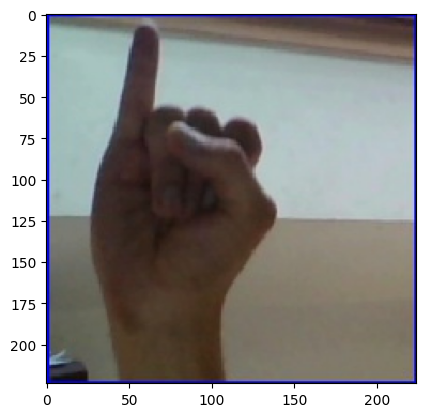

In [162]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
import csv
import os
import cv2


 
# assign directory
directory = 'F:\\Insaid\\ASL\\data\\asl_alphabet_test\\asl_alphabet_test\\'
line = ""
# iterate over files in
# that directory
for filename in os.scandir(directory):
        count = 0
        if filename.is_file():
            path = directory + str(filename.name)
            #print(filename.name)
            img = tf.keras.utils.load_img(path,target_size=(224,224))
            img = np.asarray(img)
            plt.imshow(img)
            img = np.expand_dims(img, axis=0)
            output = saved_model.predict(img)
            cat = category(output)
            opline = str((filename.name)+"," +cat)
            line= line + (opline) + '\n'
            #print((line))

print((line))
writetocsv(line)
